In [41]:
##Implement code from
##https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.568691
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.876030
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.131361
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,28.159733
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.311039


In [42]:
## rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

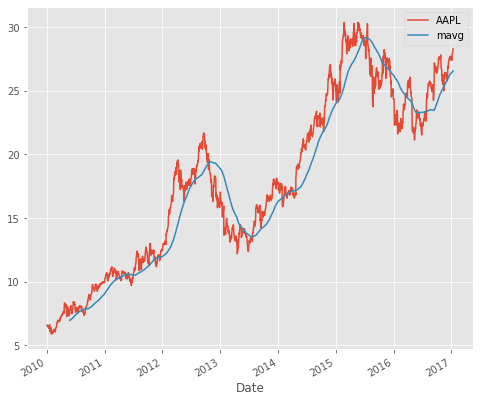

In [43]:
#plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

<AxesSubplot:xlabel='Date'>

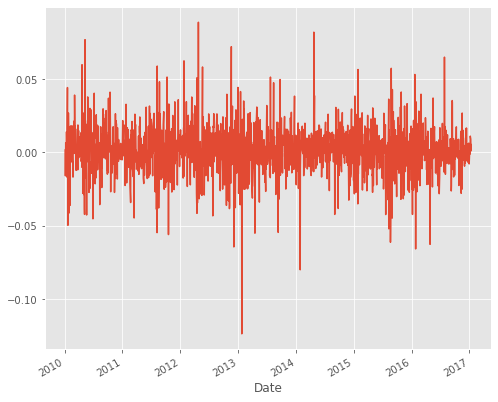

In [44]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [45]:
## Analyze competitors stocks
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [46]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
print(corr)

Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.381501  0.411692  0.383905  0.393466
GE       0.381501  1.000000  0.422301  0.535501  0.474069
GOOG     0.411692  0.422301  1.000000  0.402874  0.472083
IBM      0.383905  0.535501  0.402874  1.000000  0.496905
MSFT     0.393466  0.474069  0.472083  0.496905  1.000000


Text(0, 0.5, 'Returns GE')

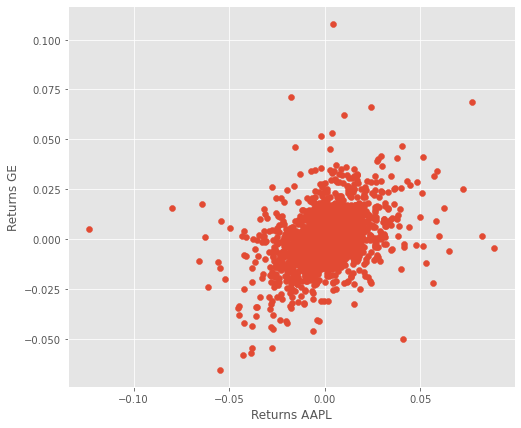

In [47]:
##Plot with scatter
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

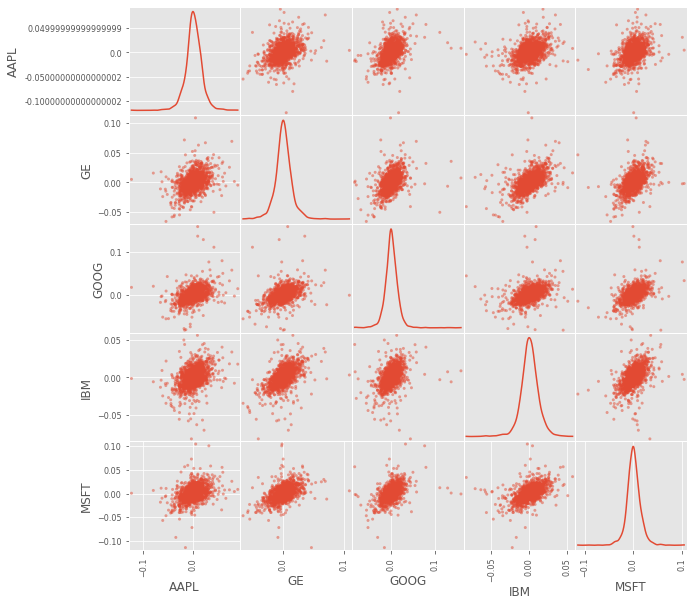

In [48]:
##Kernel density estimation
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))
plt.show()

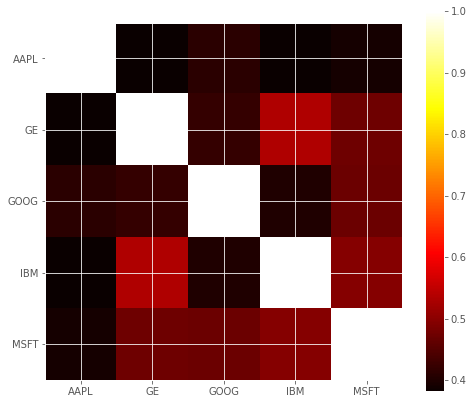

In [49]:
#Heat map
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [50]:
## Stocks Returns Rate and Risk


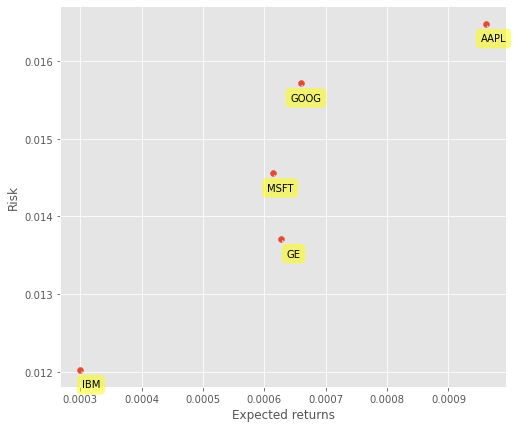

In [51]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [52]:
## Predict stock price
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0